<a href="https://colab.research.google.com/github/leoka90/Chandan-Kumar-Sah/blob/main/Task8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Libraries

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

# Importing Dataset and Preprocessing

In [2]:
dataframe= pd.read_csv("/content/Mall_Customers.csv")
dataframe.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
dataframe.dtypes

,0
CustomerID,int64
Gender,object
Age,int64
Annual Income (k$),int64
Spending Score (1-100),int64


In [4]:
dataframe.isnull().sum()

,0
CustomerID,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


In [5]:
dataframe.describe()


,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [20]:
data = dataframe.drop(['CustomerID'], axis=1)

In [50]:
X = dataframe[["Annual Income (k$)", "Spending Score (1-100)"]]
X.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


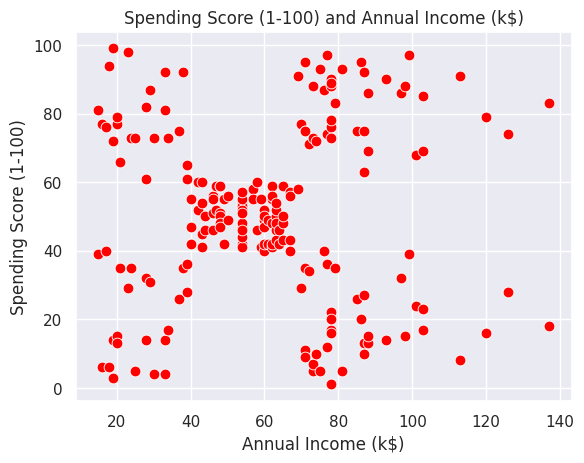

In [54]:
sns.scatterplot(x="Annual Income (k$)", y="Spending Score (1-100)", data=X, s=60, color="red")

plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Spending Score (1-100) and Annual Income (k$)')

plt.show()

**Fit K_means**

In [55]:
k_means_1 = KMeans(n_clusters=5, n_init="auto")
k_means_1.fit(X)
y_pred = k_means_1.predict(X)
dataframe["Clusters"] = y_pred

dataframe.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster,Clusters
0,1,Male,19,15,39,0,3
1,2,Male,21,15,81,0,0
2,3,Female,20,16,6,0,3
3,4,Female,23,16,77,0,0
4,5,Female,31,17,40,0,3


**Elbow Method**

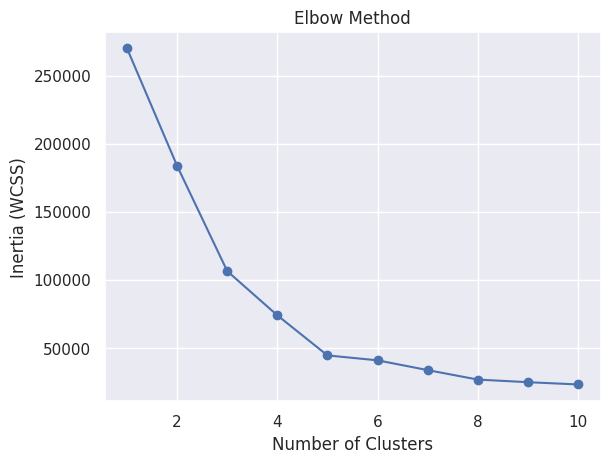

In [56]:
inertia = []
for k in range(1, 11):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(dataframe[['Annual Income (k$)', 'Spending Score (1-100)']])
    inertia.append(km.inertia_)

plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia (WCSS)")
plt.title("Elbow Method")
plt.show()

**Visulize Clusters using colorcoding**

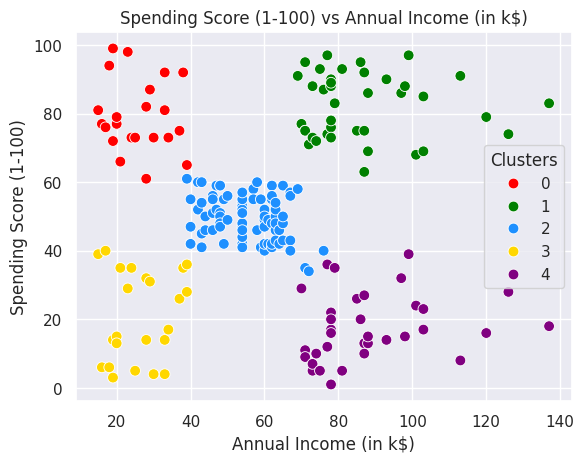

In [58]:
colors = ["red", "green", "dodgerblue", "gold", "purple"]
sns.scatterplot(
    x="Annual Income (k$)",
    y="Spending Score (1-100)",
    hue="Clusters",
    palette=colors,
    legend="full",
    data=dataframe,
    s=60
)

plt.xlabel('Annual Income (in k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Spending Score (1-100) vs Annual Income (in k$)')
plt.show()

**Evaluate Clustering using Silhouette Score**

In [60]:
score = silhouette_score(dataframe[['Annual Income (k$)', 'Spending Score (1-100)']], dataframe['Clusters'])
print(f"Silhouette Score: {score:.2f}")

Silhouette Score: 0.55
